**Author:** @curbsideprophet  
**Date written:** 2022-01-29  
**Last updated:** 2022-01-31  
**Objective:** visualize price of $NETA by pulling statistics from ErgoDEX indexer  

## Load modules

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

## Retrieve on-chain data

In [12]:
POSTGRES_ADDRESS = ADDRESS
POSTGRES_PORT = PORT
POSTGRES_USERNAME = USERNAME
POSTGRES_PASSWORD = PASSWORD
POSTGRES_DBNAME = DBNAME

postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))

conn = create_engine(postgres_str)

qry = open('../sql/anetabtc-ergodex_price.sql', 'r')
neta = pd.read_sql_query(qry.read(), conn)
qry.close()

In [13]:
neta['100 Block Avg'] = neta['price'].rolling(window=100).mean()
neta.rename(columns={'price':'Price'}, inplace=True)
neta = neta[['global_index', 'Price', '100 Block Avg']] 
neta = neta.melt(id_vars='global_index')
neta.rename(columns={'variable':'segment'}, inplace=True)

<Figure size 600x400 with 0 Axes>

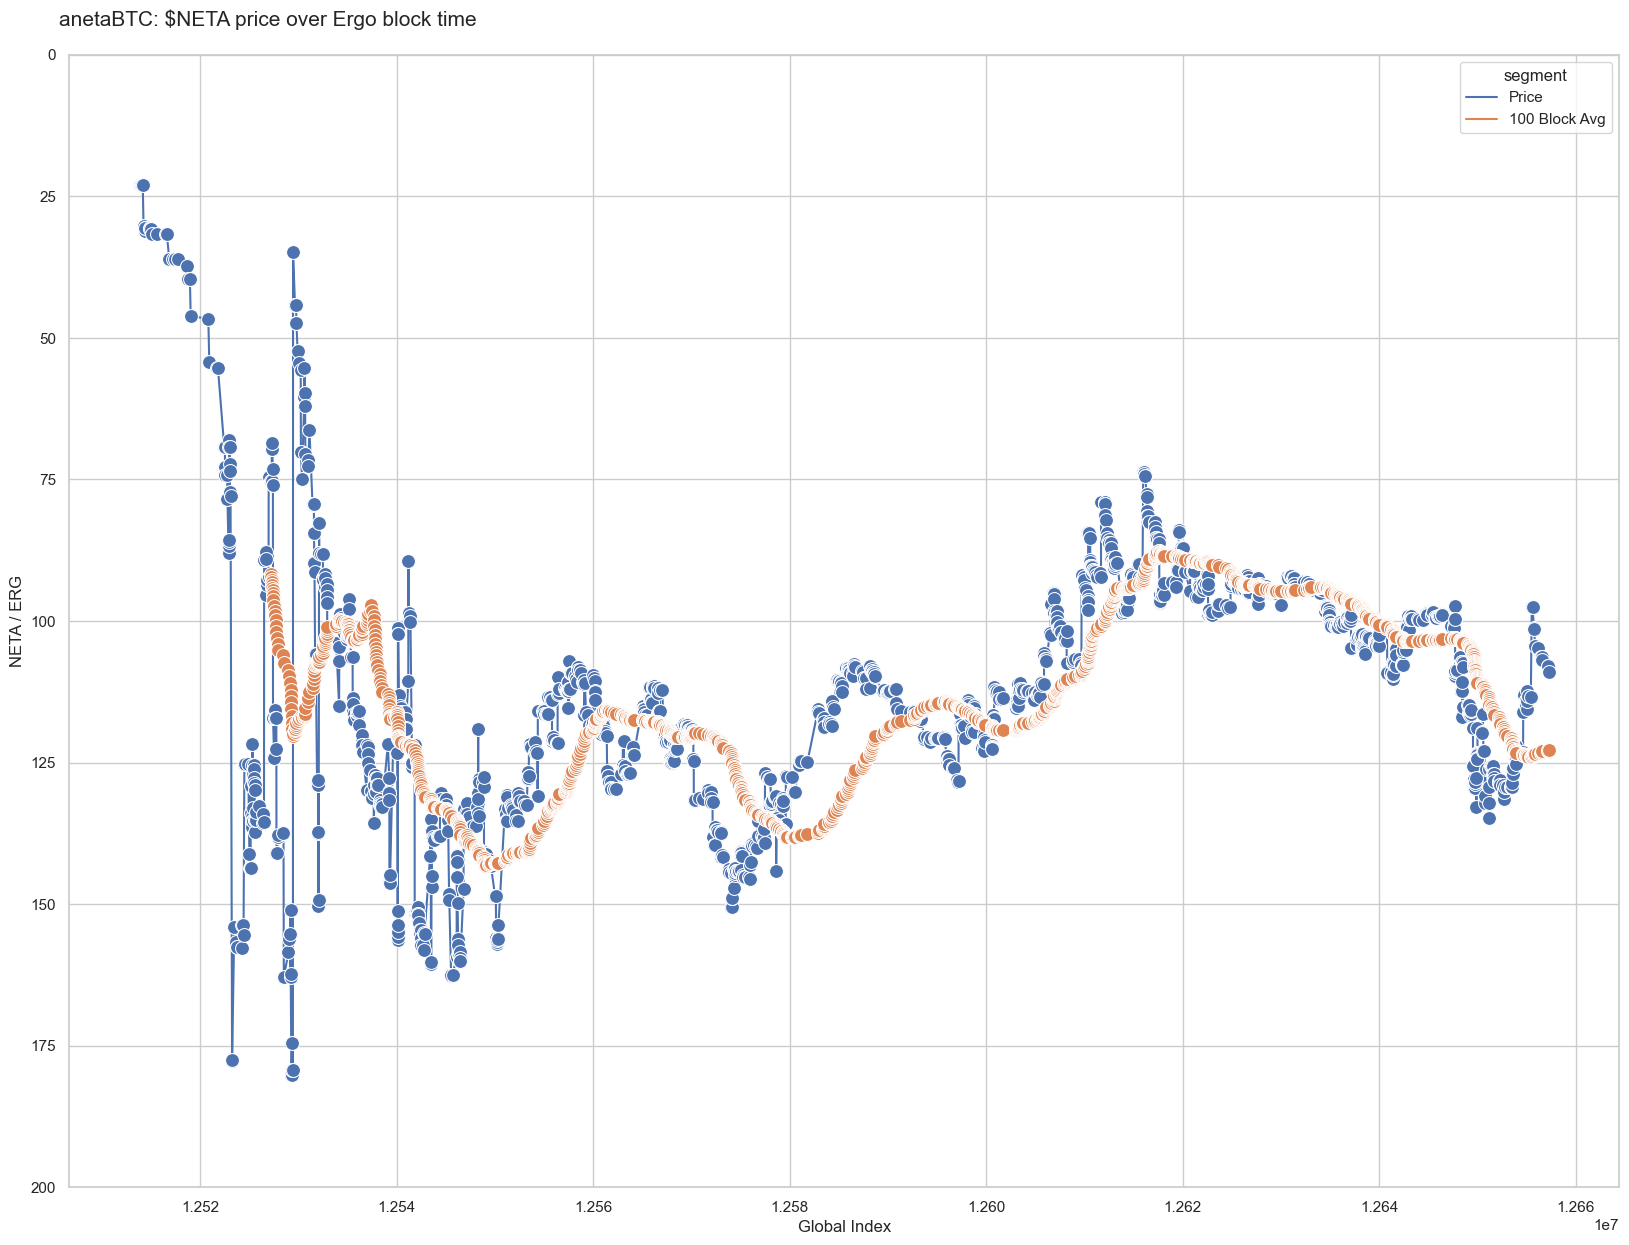

In [14]:
sns.set(style='whitegrid')

plt.clf()
plt.rcParams["figure.dpi"] = 100
fig = plt.figure(figsize=(20,15))

sns.lineplot(x='global_index', y='value', hue='segment', marker='o', markersize=10, data=neta).invert_yaxis()
plt.ylim(200, 0)
plt.suptitle("anetaBTC: $NETA price over Ergo block time", x=0.12, y=0.91, fontsize=15, horizontalalignment='left')
plt.xlabel("Global Index")
plt.ylabel("NETA / ERG")

plt.show()